# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [58]:
### YOUR CODE HERE ###

# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows of data

In [3]:
### YOUR CODE HERE ###
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [5]:
### YOUR CODE HERE ###
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.
</details>

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [7]:
### YOUR CODE HERE ###
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

<details>
  <summary><h4><strong> Hint 1 </strong></h4></summary>

Use the `unique()` function on the column `'Class'`.

</details>

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [19]:
### YOUR CODE HERE ###
print('Counts:\n',df_original['satisfaction'].value_counts())
print()

print('Percentage:\n',df_original['satisfaction'].value_counts(normalize=True)*100)


Counts:
 satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

Percentage:
 satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64


<details>
  <summary><h4><strong> Hint 1</strong> </h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

Use the `value_counts()` function. Set the `dropna` parameter passed in to this function to `False` if you want to examine how many NaN values there are. 

</details>

**Question:** How many satisfied and dissatisfied customers were there?

There were 71087 satisfied and 58793 dissatisfied customers.

**Question:** What percentage of customers were satisfied? 

54.73% of the customers were satisfied.

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [20]:
### YOUR CODE HERE ###
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

<details>
  <summary><h4><strong>Hint 1</h4></summary></strong>

Use the `isnull` function and the `sum` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Why is it important to check how many rows and columns there are in the dataset?

With the knowledge of the size of the dataset, we can determine the degree of importance of each observation, because when there is a smaller dataset, we should try to include as much data as possible and should minimize the deletion of data because each observation could have an impact on the end result of the analysis. Whereas when the size of the dataset is huge, we could delete some unwanted observations as it would generally not affect the results.

### Check the number of rows and columns in the dataset

In [24]:
### YOUR CODE HERE ###
df_original.shape

(129880, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `shape` attribute on the DataFrame.

</details>

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [25]:
### YOUR CODE HERE ###
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [26]:
### YOUR CODE HERE ###
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `isna()`function and the `sum()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isna()` function followed by the `sum()` function.

</details>

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [27]:
### YOUR CODE HERE ###
df_subset.shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [30]:
### YOUR CODE HERE ###
mapping = {'Eco':1,'Eco Plus':2,'Business':3}
df_subset['Class'] = df_subset['Class'].replace(mapping)
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` or `replace()` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For both functions, you will need to pass in a dictionary of class mappings `{"Business": 3, "Eco Plus": 2, "Eco": 1})`.

</details>

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [31]:
### YOUR CODE HERE ###
ymapping = {'satisfied':1,'dissatisfied':0}
df_subset['satisfaction'] = df_subset['satisfaction'].replace(ymapping)
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` function to assign existing values in a column to new values.

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Call `map()` on the `satisfaction` column and pass in a dictionary specifying that `"satisfied"` should be assigned to `1` and `"dissatisfied"` should be assigned to `0`.

</details>

<details>
  <summary><h4><strong> Hint 3 </strong></h4></summary>

Update the `satisfaction` column in `df_subset` with the newly assigned values.

</details>

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [33]:
### YOUR CODE HERE ###
df_subset= pd.get_dummies(df_subset, columns=['Customer Type','Type of Travel'])
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,5,3,2,0,0.0,1,0,0,1
1,1,47,3,2464,0,0,0,3,0,2,...,4,2,3,2,310,305.0,1,0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,4,4,4,2,0,0.0,1,0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,4,1,3,0,0.0,1,0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,4,2,5,0,0.0,1,0,0,1


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `get_dummies()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Set the `drop_first` parameter to `True`. This removes redundant data.

</details>

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [34]:
### YOUR CODE HERE ###
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Age                                129487 non-null  int64  
 2   Class                              129487 non-null  int64  
 3   Flight Distance                    129487 non-null  int64  
 4   Seat comfort                       129487 non-null  int64  
 5   Departure/Arrival time convenient  129487 non-null  int64  
 6   Food and drink                     129487 non-null  int64  
 7   Gate location                      129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Inflight entertainment             129487 non-null  int64  
 10  Online support                     129487 non-null  int64  
 11  Ease of Online booking             1294

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [36]:
### YOUR CODE HERE ###
X = df_subset.drop(columns=['satisfaction'],axis=1)
y = df_subset['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Pass in `0` to `random_state`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

If you named your features matrix X and your target y, then it would be `train_test_split(X, y, test_size=0.25, random_state=0)`.

</details>

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [37]:
### YOUR CODE HERE ###
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
dt_pred = decision_tree.predict(X_test)


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `DecisionTreeClassifier`, the `fit()` function, and the `predict()` function.

</details>

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

Decision Trees model could be used to predict both classification and regression type labels, and results are generated based on a tree-like structure, so it can handle both categorical and numerical data and would require little to no data processing, and it also allows easier interpretation and visualization of the prediction process.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [40]:
### YOUR CODE HERE ###
print('Accuracy score: ',accuracy_score(y_test,dt_pred))
print('Precision score: ',precision_score(y_test,dt_pred))
print('Recall score: ',recall_score(y_test,dt_pred))
print('F1 score: ', f1_score(y_test,dt_pred))

Accuracy score:  0.9363029778821204
Precision score:  0.9403271291596165
Recall score:  0.9431998189635664
F1 score:  0.9417612833982941


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score` and `metrics.f1_score` functions.
    
</details> 

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

Additional steps to improve the performance may include hyperparameters tuning using functions like GridSearch to find the best hyperparameters and help prevent overfitting.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

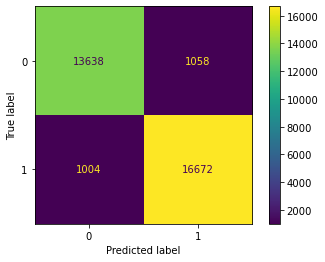

In [47]:
### YOUR CODE HERE ###
cm = confusion_matrix(y_test,dt_pred,
                      labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=decision_tree.classes_)
disp.plot(values_format='')


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `metrics.confusion_matrix`, `metrics.ConfusionMatrixDisplay`, and the `plot()` function.

</details>

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

Both false negatives and positives are low compared to true values, this means the results are very accurate, and that more than 90% of the values are correctly identified, with minimal false predictions.

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

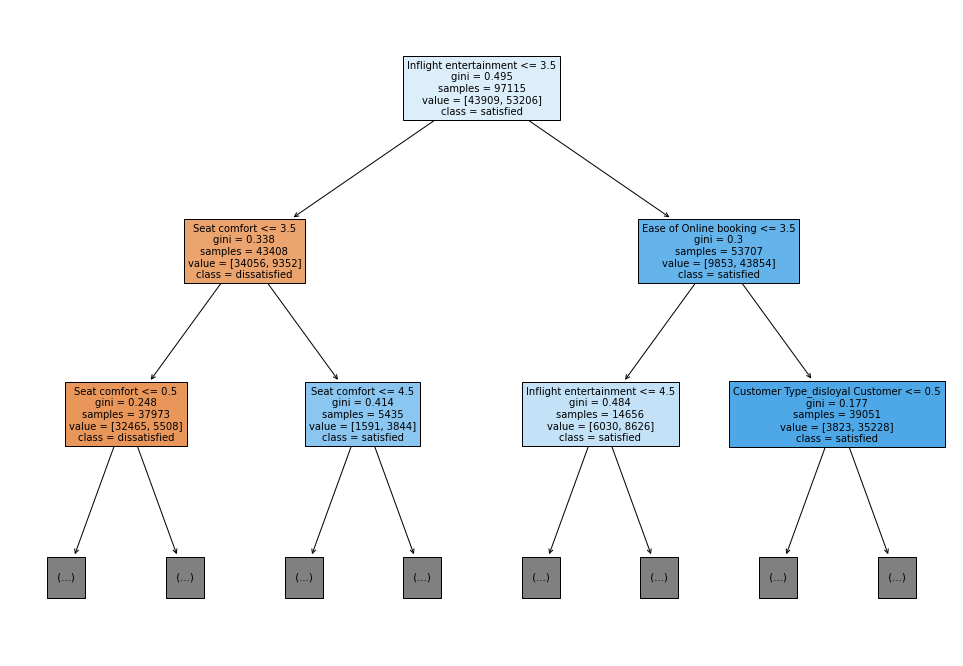

In [57]:
### YOUR CODE HERE ###
plt.figure(figsize=(17,12))
plot_tree(decision_tree,
         feature_names=X.columns,
         max_depth=2,
         fontsize=10,
         class_names={0:'dissatisfied',1:'satisfied'},
         filled=True)
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

If your tree is hard to read, pass `2` or `3` in the parameter `max_depth`. 

</details>

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [59]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [61]:
### YOUR CODE HERE ###
tuned_decision_tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tuned_decision_tree,
                  param_grid=tree_para,
                   scoring=scoring,
                  cv=5,
                  refit='f1')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about decision trees and grid search](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree). 

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Use `DecisionTreeClassifier()`, `GridSearchCV()`, and the `clf.fit()` function.

</details>

**Question:** How can you determine the best combination of values for the hyperparameters? 

In GridSearchCV, it runs a model repeatedly, each with different combinations of hyperparameters and cross validation folds until all specified hyperparameters and folds is tested, after this, the model with the best validation score is chosen and fitted again with all training data for best performance.

This results in a tuned model that uses the best combination of values for the hyperparameters, the best_estimator_ attribute could be used on GridSearchCV to return the best estimator based on the specified scoring metric.

### Compute the best combination of values for the hyperparameters

In [62]:
### YOUR CODE HERE ###
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `best_estimator_` attribute.

</details>

**Question:** What is the best combination of values for the hyperparameters? 

The best combination of values for the hyperparameters are:

max_depth=15 and min_samples_leaf=9

<strong> Question: What was the best average validation score? </strong>

In [63]:
### YOUR CODE HERE ###
clf.best_score_

0.9433213988031124

The best average validation score is 0.943

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [84]:
### YOUR CODE HERE

results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score
    row_best_f1 = results.sort_values(by='rank_test_f1').iloc[0]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    accuracy = row_best_f1['mean_test_accuracy']
    precision = row_best_f1['mean_test_precision']
    recall = row_best_f1['mean_test_recall']
    f1 = row_best_f1['mean_test_f1']
    
    # Create table of results
    best_result = pd.DataFrame().append({'model_name':model_name,
                                         'accuracy':accuracy,
                                         'precision':precision,
                                         'recall':recall,
                                         'f1':f1},
                                        ignore_index=True)
    return best_result
results = results.append(make_results('Tuned Decision Tree',clf))
results

,model_name,accuracy,precision,recall,f1
0,Tuned Decision Tree,0.938444,0.951798,0.935007,0.943321


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

The extra steps taken with GridSearchCV modelling does decrease the risk of overfittin, but the original F1 score is 0.942, while the model with tuned hyperparameters are 0.943, there is no meaningful difference between their score, and therefore I don't think it is worth the computational cost.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

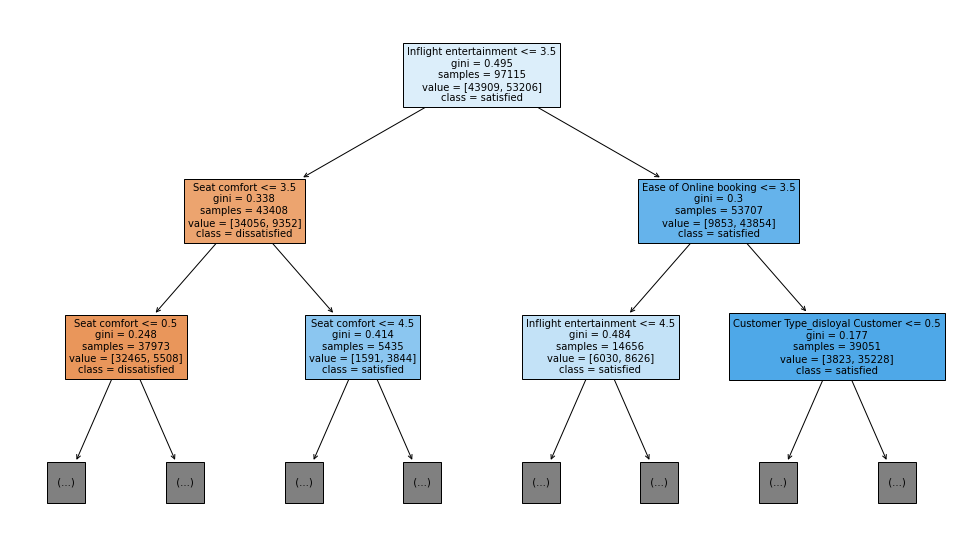

In [86]:
### YOUR CODE HERE ###
plt.figure(figsize=(17,10))
plot_tree(clf.best_estimator_,
         feature_names=X.columns,
         max_depth=2,
         fontsize=10,
         class_names={0:'dissatisfied',1:'satisfied'},
         filled=True)
plt.show()

Which features did the model use first to sort the samples?

## Conclusion

**What are some key takeaways that you learned from this lab?**

- Hyperparameter tuning can be used to reduce the risk of overfitting, by iteratively testing out every combination of the specified list of hyperparameters with different set of validation folds, and choosing the best model of all combinations.
- Hyperparameter tuning is a process that involves high computation workload and may not be worth it based on the project's available resources.
- The decision tree visualization can be used to identify the most important variables that contribute to our problem.

**What findings would you share with others?**

- The Decision tree model accurately predicted satisfaction over 94 percent of the time.
- Based on the visualization of the decision tree, it suggests that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the most important features in the model.

**What would you recommend to stakeholders?**

- Based on the success of the decision tree model, it suggests that Customer satisfaction is highly tied to 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking'. Improving these experiences should lead to better customer satisfaction rate.
- This model semed to be very good at predicting customer satisfaction, and the airline should invest more effort into model building and model understanding.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged